<a href="https://colab.research.google.com/github/bommojuvishu/pycoderpricetrend/blob/main/pycoder_pricetrend.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.1 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0


In [3]:
import yfinance as yf
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import pandas as pd
import io

In [10]:
#nifty 50
liststocks =["HINDALCO","JSWSTEEL","CIPLA","INFY","TATASTEEL","NESTLEIND","APOLLOHOSP","DRREDDY","DIVISLAB","WIPRO","ULTRACEMCO","SUNPHARMA","ASIANPAINT","HCLTECH","TECHM","ADANIPORTS","LT","UPL","ITC","BAJFINANCE","TCS","HDFCBANK","ONGC","TATAMOTORS","GRASIM","HEROMOTOCO","EICHERMOT","BAJAJFINSV","BPCL","HINDUNILVR","INDUSINDBK","HDFCLIFE","AXISBANK","M&M","HDFC","ICICIBANK","BAJAJ-AUTO","BRITANNIA","SHREECEM","TITAN","POWERGRID","SBILIFE","KOTAKBANK","BHARTIARTL","MARUTI","RELIANCE","SBIN","COALINDIA","NTPC","TATACONSUM"]

In [ ]:
#nifty 500
# liststocks = ["3MINDIA","ABB","ACC","AIAENG","APLAPOLLO","AUBANK","AARTIDRUGS","AARTIIND","AAVAS","ABBOTINDIA","ADANIENT","ADANIGREEN","ADANIPORTS","ATGL","ADANITRANS","ABCAPITAL","ABFRL","ADVENZYMES","AEGISCHEM","AFFLE","AJANTPHARM","ALEMBICLTD","APLLTD","ALKEM","ALKYLAMINE","ALOKINDS","AMARAJABAT","AMBER","AMBUJACEM","ANGELONE","ANURAS","APOLLOHOSP","APOLLOTYRE","ASAHIINDIA","ASHOKLEY","ASHOKA","ASIANPAINT","ASTERDM","ASTRAZEN","ASTRAL","ATUL","AUROPHARMA","AVANTIFEED","DMART","AXISBANK","BASF","BEML","BSE","BAJAJ-AUTO","BAJAJCON","BAJAJELEC","BAJFINANCE","BAJAJFINSV","BAJAJHLDNG","BALAMINES","BALKRISIND","BALRAMCHIN","BANDHANBNK","BANKBARODA","BANKINDIA","MAHABANK","BATAINDIA","BAYERCROP","BERGEPAINT","BDL","BEL","BHARATFORG","BHEL","BPCL","BHARATRAS","BHARTIARTL","BIOCON","BIRLACORPN","BSOFT","BLUEDART","BLUESTARCO","BBTC","BOSCHLTD","BRIGADE","BRITANNIA","CCL","CESC","CGPOWER","CRISIL","CSBBANK","CADILAHC","CANFINHOME","CANBK","CAPLIPOINT","CGCL","CARBORUNIV","CASTROLIND","CEATLTD","CENTRALBK","CDSL","CENTURYPLY","CENTURYTEX","CERA","CHALET","CHAMBLFERT","CHOLAHLDNG","CHOLAFIN","CIPLA","CUB","COALINDIA","COCHINSHIP","COFORGE","COLPAL","CAMS","CONCOR","COROMANDEL","CREDITACC","CROMPTON","CUMMINSIND","CYIENT","DCBBANK","DCMSHRIRAM","DLF","DABUR","DALBHARAT","DEEPAKNTR","DELTACORP","DHANI","DHANUKA","DBL","DIVISLAB","DIXON","LALPATHLAB","DRREDDY","EIDPARRY","EIHOTEL","EPL","EDELWEISS","EICHERMOT","ELGIEQUIP","EMAMILTD","ENDURANCE","ENGINERSIN","EQUITAS","EQUITASBNK","ERIS","ESCORTS","EXIDEIND","FDC","FEDERALBNK","FACT","FINEORG","FINCABLES","FINPIPE","FSL","FORTIS","FRETAIL","GAIL","GMMPFAUDLR","GALAXYSURF","GARFIBRES","GICRE","GILLETTE","GLAND","GLAXO","GLENMARK","GODFRYPHLP","GODREJAGRO","GODREJCP","GODREJIND","GODREJPROP","GRANULES","GRAPHITE","GRASIM","GESHIP","GREAVESCOT","GRINDWELL","GUJALKALI","GAEL","FLUOROCHEM","GUJGASLTD","GNFC","GPPL","GSFC","GSPL","HEG","HCLTECH","HDFCAMC","HDFCBANK","HDFCLIFE","HFCL","HAPPSTMNDS","HATHWAY","HATSUN","HAVELLS","HEIDELBERG","HEMIPROP","HEROMOTOCO","HIKAL","HINDALCO","HGS","HAL","HINDCOPPER","HINDPETRO","HINDUNILVR","HINDZINC","POWERINDIA","HOMEFIRST","HONAUT","HUDCO","HDFC","ICICIBANK","ICICIGI","ICICIPRULI","ISEC","IDBI","IDFCFIRSTB","IDFC","IFBIND","IIFL","IIFLWAM","IOLCP","IRB","IRCON","ITC","ITI","INDIACEM","IBULHSGFIN","IBREALEST","INDIAMART","INDIANB","IEX","INDHOTEL","IOC","IOB","IRCTC","IRFC","INDIGOPNTS","ICIL","INDOCO","IGL","INDUSTOWER","INDUSINDBK","INFIBEAM","NAUKRI","INFY","INGERRAND","INOXLEISUR","INTELLECT","INDIGO","IPCALAB","JBCHEPHARM","JKCEMENT","JKLAKSHMI","JKPAPER","JKTYRE","JMFINANCIL","JSWENERGY","JSWSTEEL","JAMNAAUTO","JINDALSAW","JSLHISAR","JSL","JINDALSTEL","JCHAC","JUBLFOOD","JUBLINGREA","JUBLPHARMA","JUSTDIAL","JYOTHYLAB","KPRMILL","KEI","KNRCON","KPITTECH","KRBL","KSB","KAJARIACER","KALPATPOWR","KALYANKJIL","KANSAINER","KARURVYSYA","KSCL","KEC","KOTAKBANK","L&TFH","LTTS","LICHSGFIN","LAOPALA","LAXMIMACH","LTI","LT","LAURUSLABS","LXCHEM","LEMONTREE","LINDEINDIA","LUPIN","LUXIND","MMTC","MOIL","MRF","LODHA","MGL","M&MFIN","M&M","MAHINDCIE","MHRIL","MAHLOG","MANAPPURAM","MRPL","MARICO","MARUTI","MASTEK","MFSL","MAXHEALTH","MAZDOCK","METROPOLIS","MINDTREE","MINDACORP","MINDAIND","MIDHANI","MOTILALOFS","MPHASIS","MCX","MUTHOOTFIN","NATCOPHARM","NBCC","NCC","NESCO","NHPC","NLCINDIA","NMDC","NOCIL","NTPC","NH","NATIONALUM","NFL","NAVINFLUOR","NAZARA","NESTLEIND","NETWORK18","NILKAMAL","NAM-INDIA","OBEROIRLTY","ONGC","OIL","OFSS","ORIENTELEC","PCBL","PIIND","PNBHOUSING","PNCINFRA","PVR","PAGEIND","PERSISTENT","PETRONET","PFIZER","PHOENIXLTD","PIDILITIND","PEL","POLYMED","POLYCAB","POLYPLEX","POONAWALLA","PFC","POWERGRID","PRAJIND","PRESTIGE","PRINCEPIPE","PRSMJOHNSN","PGHL","PGHH","PNB","QUESS","RBLBANK","RECLTD","RHIM","RITES","RADICO","RVNL","RAILTEL","RAIN","RAJESHEXPO","RALLIS","RCF","RATNAMANI","REDINGTON","RELAXO","RELIANCE","RBA","ROSSARI","ROUTE","SBICARD","SBILIFE","SIS","SJVN","SKFINDIA","SRF","SANOFI","SCHAEFFLER","SCHNEIDER","SEQUENT","SHARDACROP","SFL","SHILPAMED","SCI","SHREECEM","SHRIRAMCIT","SRTRANSFIN","SIEMENS","SOBHA","SOLARINDS","SOLARA","SONACOMS","SONATSOFTW","SPANDANA","SPICEJET","STARCEMENT","SBIN","SAIL","SWSOLAR","STLTECH","STAR","SUDARSCHEM","SUMICHEM","SPARC","SUNPHARMA","SUNTV","SUNDARMFIN","SUNDRMFAST","SUNTECK","SUPRAJIT","SUPREMEIND","SUPPETRO","SUVENPHAR","SUZLON","SYMPHONY","SYNGENE","TCIEXP","TCNSBRANDS","TTKPRESTIG","TV18BRDCST","TVSMOTOR","TANLA","TASTYBITE","TATACHEM","TATACOFFEE","TATACOMM","TCS","TATACONSUM","TATAELXSI","TATAMTRDVR","TATAMOTORS","TATAPOWER","TATASTLLP","TATASTEEL","TTML","TEAMLEASE","TECHM","NIACL","RAMCOCEM","THERMAX","THYROCARE","TIMKEN","TITAN","TORNTPHARM","TORNTPOWER","TRENT","TRIDENT","TRITURBINE","TIINDIA","UCOBANK","UFLEX","UPL","UTIAMC","UJJIVAN","UJJIVANSFB","ULTRACEMCO","UNIONBANK","UBL","MCDOWELL-N","VGUARD","VMART","VIPIND","VAIBHAVGBL","VAKRANGEE","VALIANTORG","VTL","VARROC","VBL","VEDL","VENKEYS","VINATIORGA","IDEA","VOLTAS","WABCOINDIA","WELCORP","WELSPUNIND","WESTLIFE","WHIRLPOOL","WIPRO","WOCKPHARMA","YESBANK","ZEEL","ZENSARTECH","ZYDUSWELL","ECLERX"]

[*********************100%***********************]  1 of 1 completed
HINDALCO -0.4125735831047636 -0.5625451503079886


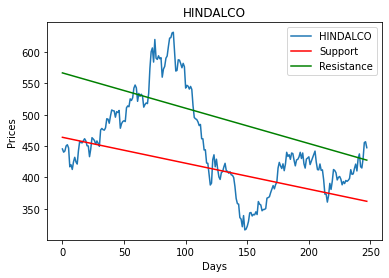

[*********************100%***********************]  1 of 1 completed
JSWSTEEL 0.0984935900068959 -0.03240157133137503


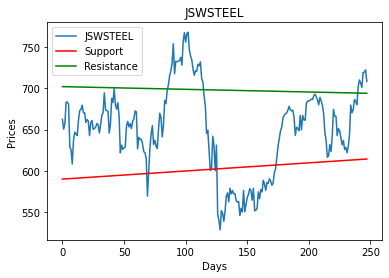

[*********************100%***********************]  1 of 1 completed
CIPLA 0.9136481796943059 0.7601860874629266


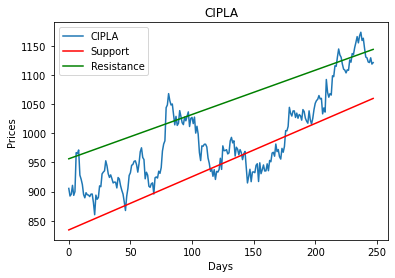

[*********************100%***********************]  1 of 1 completed
INFY -1.516134679305297 -1.6545587859209094


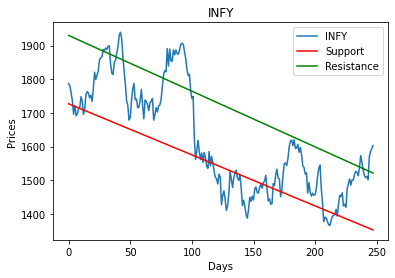

[*********************100%***********************]  1 of 1 completed
TATASTEEL -0.06037366362911098 -0.10419072243762605


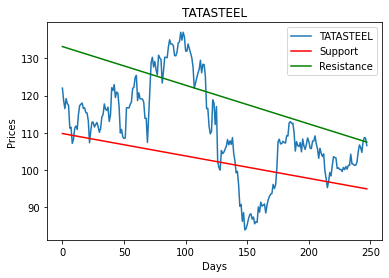

[*********************100%***********************]  1 of 1 completed
NESTLEIND 4.145502536148162 5.181080276058601


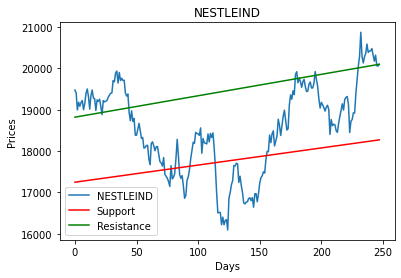

[*********************100%***********************]  1 of 1 completed
APOLLOHOSP -2.50151345446424 -4.212630875916299


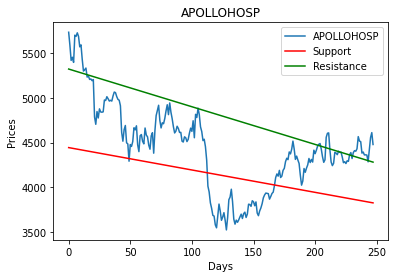

[*********************100%***********************]  1 of 1 completed
DRREDDY -0.2623776201055721 -1.1244147551149173


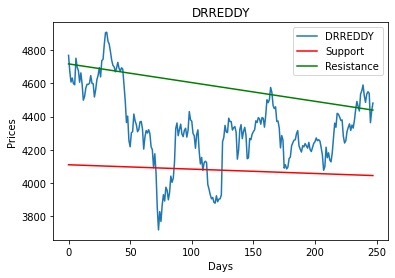

[*********************100%***********************]  1 of 1 completed
DIVISLAB -4.614098359507606 -5.151953524295513


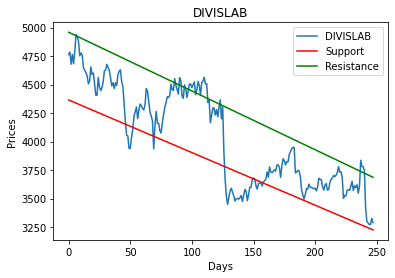

[*********************100%***********************]  1 of 1 completed
WIPRO -1.1214975243327827 -1.3685433049310856


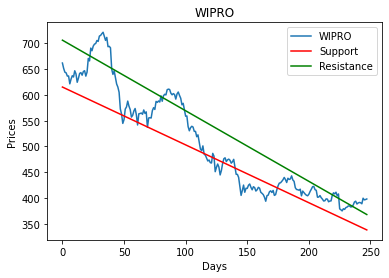

[*********************100%***********************]  1 of 1 completed
ULTRACEMCO -3.1190431026595804 -4.559870254268959


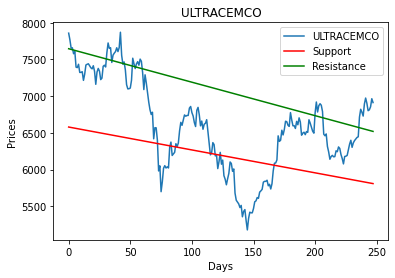

[*********************100%***********************]  1 of 1 completed
SUNPHARMA 0.7866818109915175 0.7688822049676572


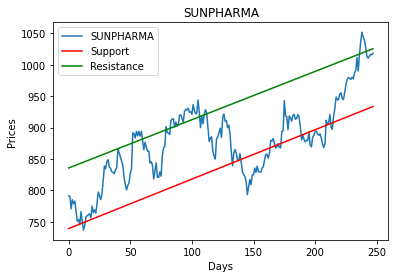

[*********************100%***********************]  1 of 1 completed
ASIANPAINT 0.3942696079084949 -0.30168353056379654


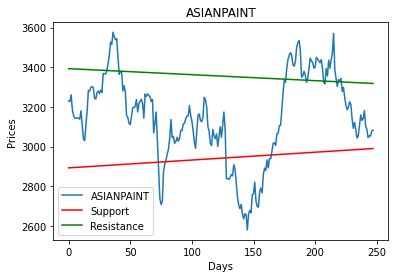

[*********************100%***********************]  1 of 1 completed
HCLTECH -0.9156977364036767 -1.2785779334315337


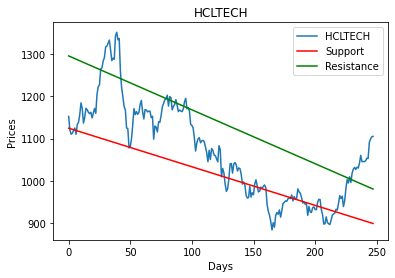

[*********************100%***********************]  1 of 1 completed
TECHM -2.6135608140867945 -3.331288271446102


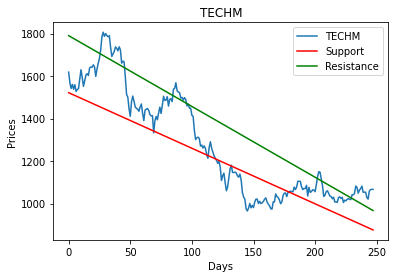

[*********************100%***********************]  1 of 1 completed
ADANIPORTS 0.5390890919888253 0.5914535237761575


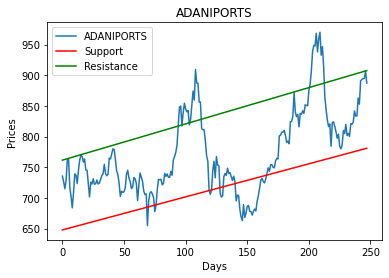

[*********************100%***********************]  1 of 1 completed
LT 0.5324102637542886 0.04464744047481796


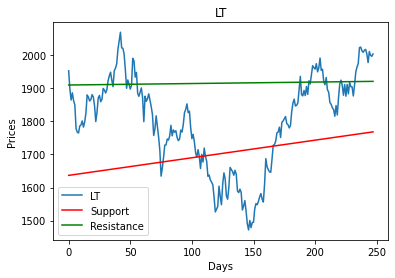

[*********************100%***********************]  1 of 1 completed
UPL -0.04385858310512466 -0.2195539865642046


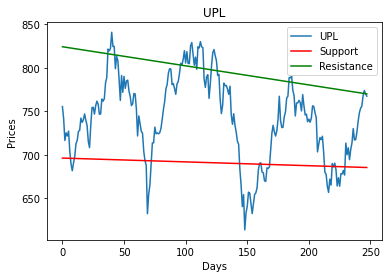

[*********************100%***********************]  1 of 1 completed
ITC 0.5969128002375739 0.575923406983158


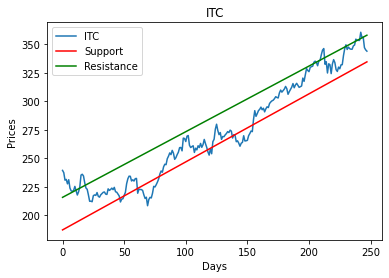

[*********************100%***********************]  1 of 1 completed
BAJFINANCE 1.6153645272324544 -1.835737685560018


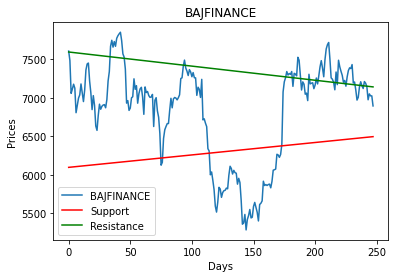

[*********************100%***********************]  1 of 1 completed
TCS -2.580752415286665 -2.9981088526978934


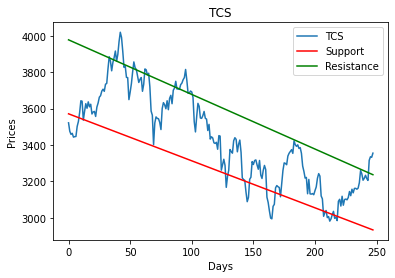

[*********************100%***********************]  1 of 1 completed
HDFCBANK -0.04291356707230148 -0.1423628492670616


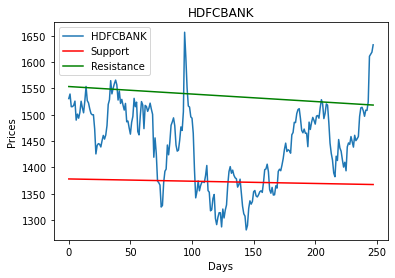

[*********************100%***********************]  1 of 1 completed
ONGC -0.10792958085427914 -0.17433011872714727


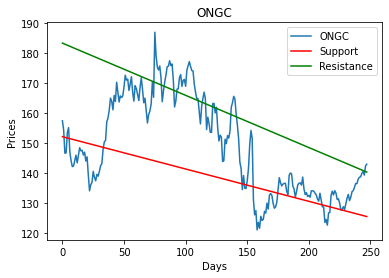

[*********************100%***********************]  1 of 1 completed
TATAMOTORS -0.14540426833061204 -0.36443053158885896


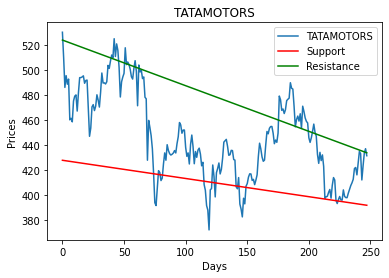

[*********************100%***********************]  1 of 1 completed
GRASIM 0.06767591414606172 -0.5698578519106557


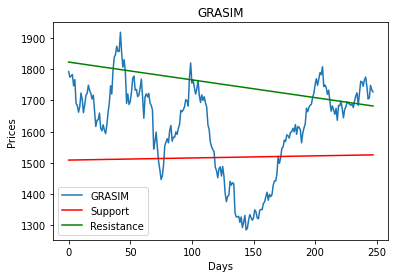

[*********************100%***********************]  1 of 1 completed
HEROMOTOCO 1.279546712388057 0.6467558527400364


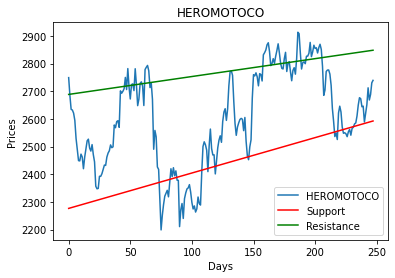

[*********************100%***********************]  1 of 1 completed
EICHERMOT 5.404921993930199 4.934139411643859


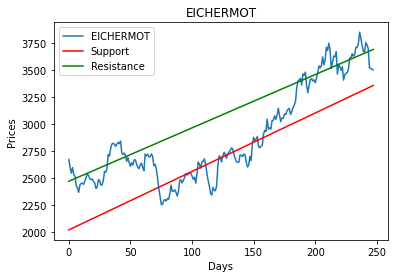

[*********************100%***********************]  1 of 1 completed
BAJAJFINSV 0.10022316240876686 -0.1500463079643669


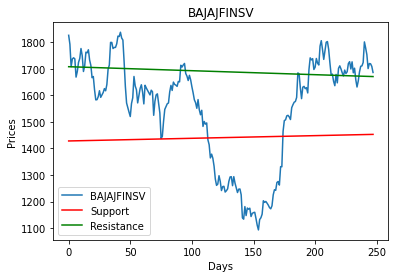

[*********************100%***********************]  1 of 1 completed
BPCL -0.32626333624235493 -0.4341571516744517


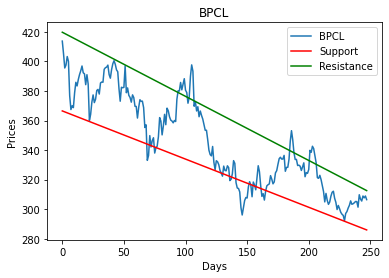

[*********************100%***********************]  1 of 1 completed
HINDUNILVR 1.7498053496149588 1.5560764838933372


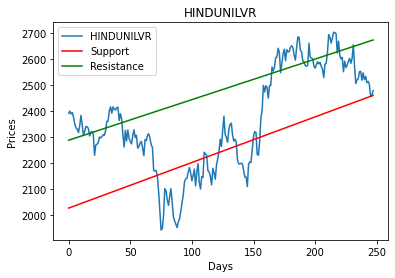

[*********************100%***********************]  1 of 1 completed
INDUSINDBK 1.215518662360503 1.0069332580642356


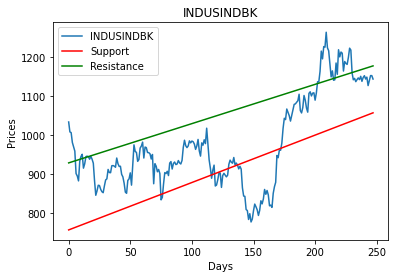

[*********************100%***********************]  1 of 1 completed
HDFCLIFE -0.42271514107612196 -0.5437987393975354


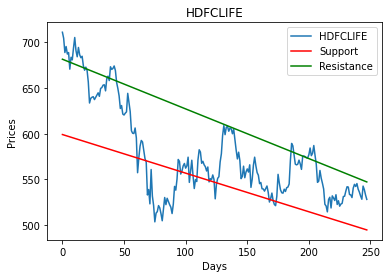

[*********************100%***********************]  1 of 1 completed
AXISBANK 0.4997351734236748 0.37592313227145224


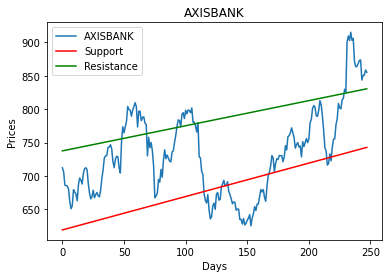

[*********************100%***********************]  1 of 1 completed
M&M 2.4578497433100988 2.3402758081921813


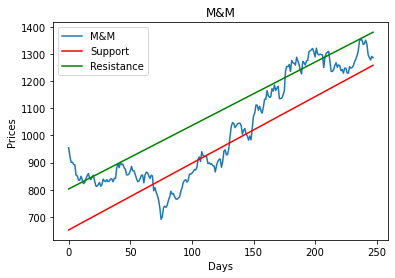

[*********************100%***********************]  1 of 1 completed
HDFC -0.7146347213713782 -1.3563388248606827


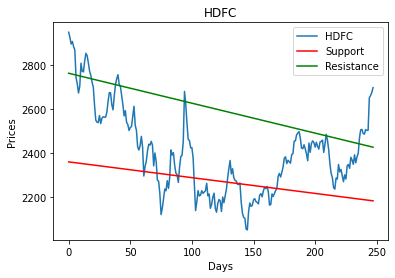

[*********************100%***********************]  1 of 1 completed
ICICIBANK 0.7857097490496382 0.6044735065616684


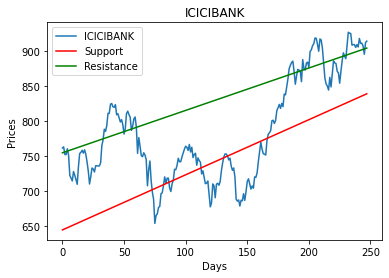

[*********************100%***********************]  1 of 1 completed
BAJAJ-AUTO 2.5507918758304338 1.592126415657128


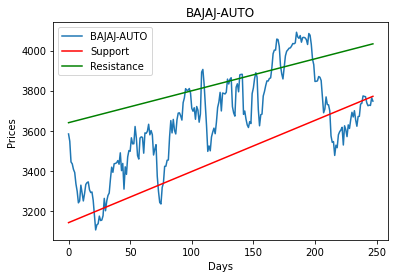

[*********************100%***********************]  1 of 1 completed
BRITANNIA 1.8459569405761331 1.6936838032633286


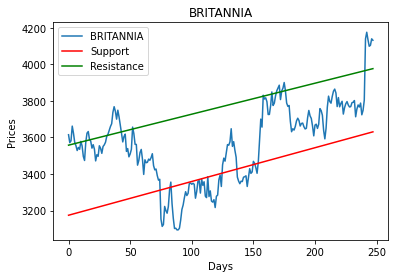

[*********************100%***********************]  1 of 1 completed
SHREECEM -18.63006144440854 -21.74882940252709


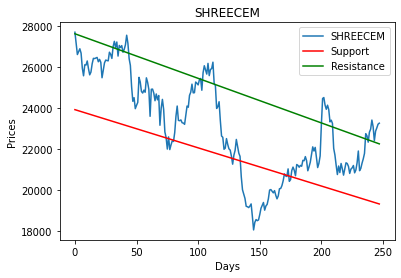

[*********************100%***********************]  1 of 1 completed
TITAN 1.2465381073477535 0.3092466699335475


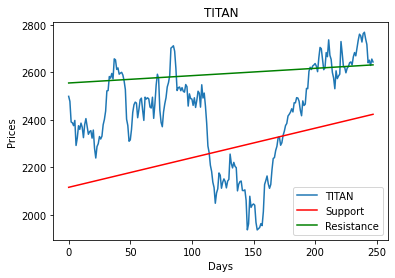

[*********************100%***********************]  1 of 1 completed
POWERGRID 0.05045338881162487 0.07336780514716143


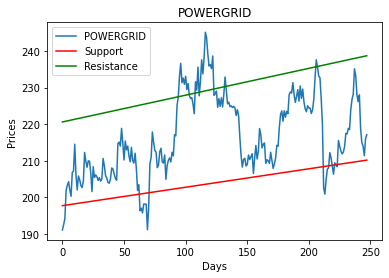

[*********************100%***********************]  1 of 1 completed
SBILIFE 0.6630224240612945 0.4519765269510445


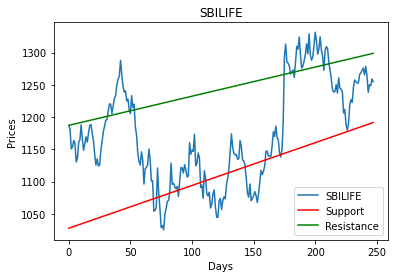

[*********************100%***********************]  1 of 1 completed
KOTAKBANK 0.2538153785737896 -0.16180024812762825


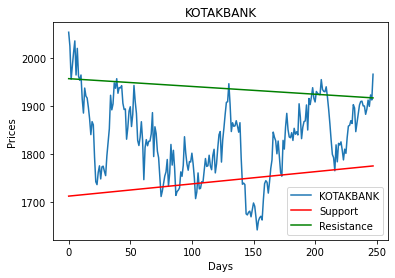

[*********************100%***********************]  1 of 1 completed
BHARTIARTL 0.38643624723174935 0.27327934443782714


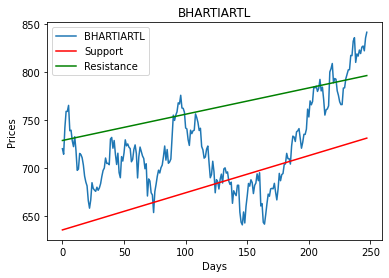

[*********************100%***********************]  1 of 1 completed
MARUTI 8.481403677068474 5.474108224561617


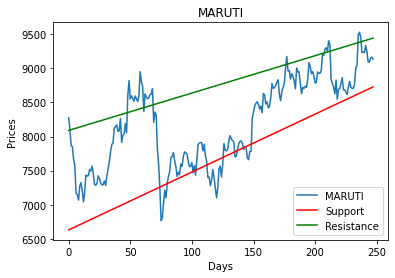

[*********************100%***********************]  1 of 1 completed
RELIANCE 0.8016226138428403 0.5057798227505168


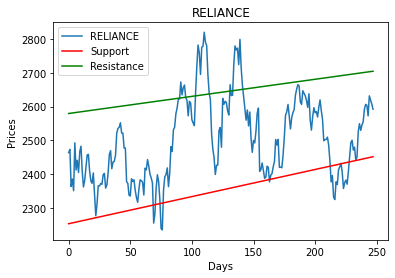

[*********************100%***********************]  1 of 1 completed
SBIN 0.40016749841742877 0.3475744145280703


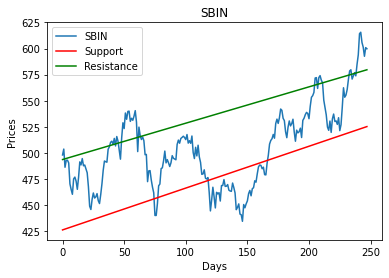

[*********************100%***********************]  1 of 1 completed
COALINDIA 0.37629275451316546 0.40502316850524367


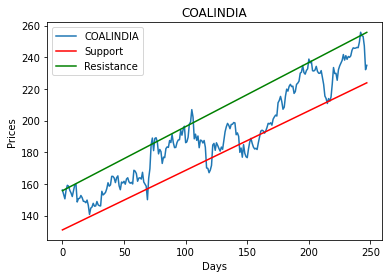

[*********************100%***********************]  1 of 1 completed
NTPC 0.1857890130405552 0.1908110644348194


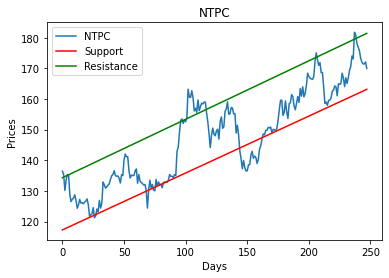

[*********************100%***********************]  1 of 1 completed
TATACONSUM 0.3120404657538915 0.12721631643033768


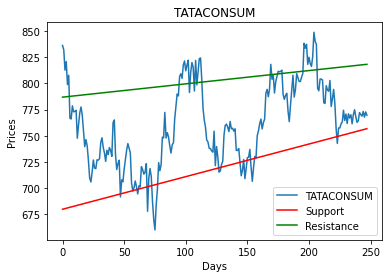

In [11]:
# liststocks=['reliance']
# liststocks =['3MINDIA', 'AIAENG', 'APLAPOLLO', 'AARTIDRUGS', 'ADVENZYMES', 'APOLLOHOSP', 'ASAHIINDIA', 'BAJAJFINSV', 'BHARTIARTL', 'CGPOWER', 'CUB', 'COLPAL', 'DELTACORP', 'DRREDDY', 'EIDPARRY', 'EQUITAS', 'FEDERALBNK', 'GLENMARK', 'GRANULES', 'HFCL', 'HEIDELBERG', 'HIKAL', 'ISEC', 'IDFCFIRSTB', 'IIFLWAM', 'IRCTC', 'INGERRAND', 'INOXLEISUR', 'JBCHEPHARM', 'JMFINANCIL', 'JUBLINGREA', 'JYOTHYLAB', 'KSB', 'KALPATPOWR', 'KEC', 'LTTS', 'LAOPALA', 'LTI', 'LUPIN', 'MAHINDCIE', 'MUTHOOTFIN', 'NESCO', 'NH', 'ORIENTELEC', 'PFIZER', 'PHOENIXLTD', 'POLYMED', 'PRAJIND', 'RAILTEL', 'RCF', 'SUNPHARMA', 'TCIEXP', 'TVSMOTOR', 'TATASTLLP', 'TORNTPHARM', 'UBL', 'MCDOWELL-N', 'VGUARD', 'VTL', 'VEDL', 'WELSPUNIND', 'WESTLIFE']

wind = 5
periodinput = 365
TODAY = "2022-08-01"
TODAY = (dt.datetime.today()+ dt.timedelta(1)).strftime('%Y-%m-%d') 
datetime_object = dt.datetime.strptime(TODAY, '%Y-%m-%d')
result=[]
finalresult ={}
finalresult2 = {}
for name in liststocks:
  try:
      flag= False
      df = yf.download(name +'.NS',datetime_object -dt.timedelta(periodinput),datetime_object)
      # print(df)
      df.columns=[ 'open', 'high', 'low', 'close', 'adj close','volume']
      #Check if NA values are in data
      df=df[df['volume']!=0]
      df.reset_index(drop=True, inplace=True)
      df.isna().sum()
      closeprice = df.iloc[len(df) -1 ]['close']


      candleid = len(df) -1

      maxim = np.array([])
      minim = np.array([])
      xxmin = np.array([])
      xxmax = np.array([])
      for i in range(0, candleid+1, wind):
          minim = np.append(minim, df.low.iloc[i:i+wind].min())
          xxmin = np.append(xxmin, df.low.iloc[i:i+wind].idxmin())
      for i in range(0, candleid+1, wind):
          maxim = np.append(maxim, df.high.loc[i:i+wind].max())
          xxmax = np.append(xxmax, df.high.iloc[i:i+wind].idxmax())
      slmin, intercmin = np.polyfit(xxmin, minim,1)
      slmax, intercmax = np.polyfit(xxmax, maxim,1)
      print(name,slmin , slmax)
      # dfpl = df
      # fig = go.Figure(data=[go.Candlestick(x=dfpl.index,
      #                 open=dfpl['open'],
      #                 high=dfpl['high'],
      #                 low=dfpl['low'],
      #                 close=dfpl['close'])])
      # fig.add_trace(go.Scatter(x=xxmin, y=slmin*xxmin + intercmin, mode='lines', name='min slope'))
      # fig.add_trace(go.Scatter(x=xxmax, y=slmax*xxmax + intercmax, mode='lines', name='max slope'))
      if slmin > 0 and slmax > 0:
        inregion =[] 
        closepriceabv = False
        for index, row in df.iterrows():
          if row['close'] >= slmin*index +intercmin and  row['close'] <= slmax*index +intercmax:
            inregion.append(index)
        noofindex=len(df)
        regionresult = (len(inregion)/ noofindex)*100
        finalresult[name] = regionresult
        
        #  close price between region 
        if closeprice >= slmin*(len(df) -1) +intercmin and closeprice <= slmax*(len(df) -1) +intercmax : 
          closepriceabv =True 

        if regionresult > 70 and closepriceabv :
          flag =True 

        # # intercept diff
        # interresult = ((intercmax - intercmin) / intercmin) *100
        # finalresult2[name] = interresult
        # print(interresult)

      if flag or True:
        result.append(name)
        plt.title(name)
        plt.xlabel('Days')
        plt.ylabel('Prices')
        plt.plot(df['close'], label=name)
        plt.plot(slmin*df.index.values + intercmin, label='Support', c='r')
        plt.plot(slmax*df.index.values + intercmax, label='Resistance', c='g')
        plt.legend()
        plt.show()

  except Exception as ex:
      print(ex)#raised if `y` is empty.
      print("ERROR: ", name)
      liststocks.remove(name)
      # traceback.print_exc()


In [ ]:
print(len(result))
print(",".join(result))

42
3MINDIA,AIAENG,APLAPOLLO,APOLLOHOSP,BHARTIARTL,CGPOWER,CUB,DELTACORP,DRREDDY,EIDPARRY,EQUITAS,GRANULES,HFCL,HEIDELBERG,IIFLWAM,IRCTC,JBCHEPHARM,JMFINANCIL,JUBLINGREA,JYOTHYLAB,KSB,KALPATPOWR,KEC,LAOPALA,LUPIN,MUTHOOTFIN,NESCO,NH,ORIENTELEC,PFIZER,PHOENIXLTD,POLYMED,PRAJIND,SUNPHARMA,TCIEXP,TVSMOTOR,TORNTPHARM,MCDOWELL-N,VGUARD,VTL,VEDL,WESTLIFE


In [ ]:
df=pd.DataFrame.from_dict(finalresult2,orient='index')
df.sort_values(by=[0], ascending=False)

,0
FEDERALBNK,14.210691
IDFCFIRSTB,12.509526
INGERRAND,11.978992
POLYMED,11.978918
MAHINDCIE,11.911854
CUB,11.343461
HFCL,11.309565
LAOPALA,10.901091
PRAJIND,10.802485
WESTLIFE,10.749762


In [ ]:
print(df)

          open        high         low       close   adj close   volume
0   807.150024  809.500000  784.099976  786.950012  786.950012  1767351
1   785.900024  796.950012  780.099976  793.950012  793.950012  2166778
2   791.900024  811.650024  787.000000  809.349976  809.349976  1890327
3   805.000000  813.000000  798.500000  805.700012  805.700012  1355374
4   808.000000  811.900024  797.500000  801.849976  801.849976  1267482
5   805.900024  810.799988  798.799988  801.950012  801.950012  1254230
6   790.000000  816.700012  783.849976  806.150024  806.150024  2181301
7   809.000000  813.950012  806.299988  809.650024  809.650024  2692962
8   809.650024  842.000000  806.000000  838.400024  838.400024  6228307
9   845.000000  847.000000  830.700012  833.700012  833.700012  1885440
10  834.000000  841.150024  829.049988  837.450012  837.450012  1553679
11  841.650024  845.799988  816.000000  818.250000  818.250000  2620566
12  815.000000  827.500000  814.049988  825.099976  825.099976  